In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


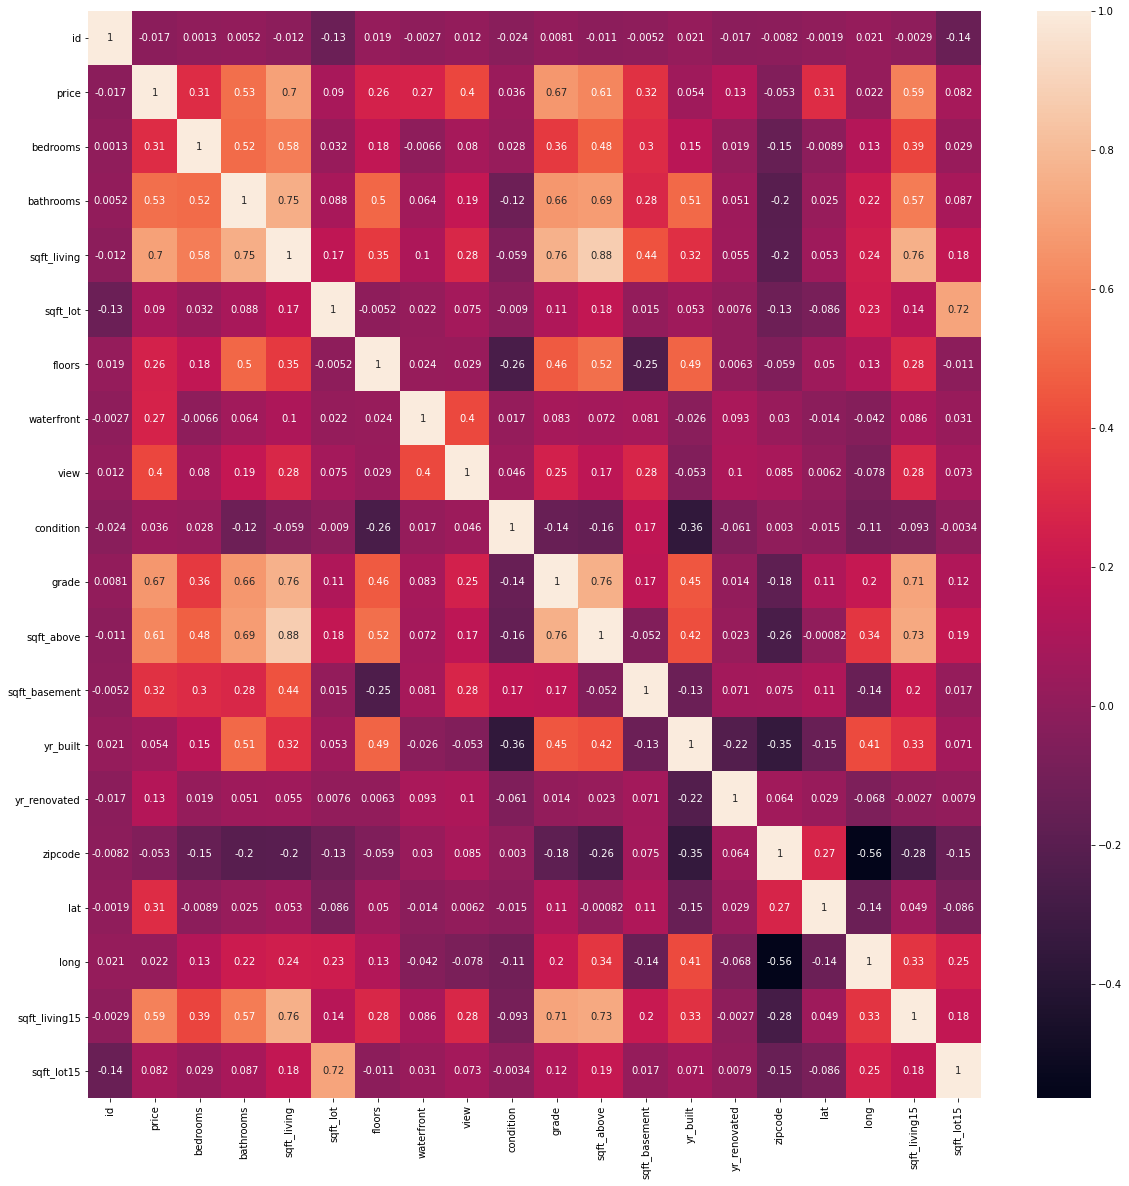

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [37]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [8]:
#Checking the pairplot.
sns.pairplot(data)
plt.show()

In [9]:
#Hists
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [10]:
# Checking the distribution of the data
#for i in data.iloc[:,:-1].columns:
  #  sns.kdeplot(data[i])
   # plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
to_drop = ['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
X, y = data[to_drop].copy(), data['price'].copy()
print(X.shape, y.shape)

(21613, 8) (21613,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
6325,3,1.75,1780,13095,1.0,0,0,4
13473,2,1.00,1000,3700,1.0,0,0,3
17614,3,1.00,1080,7486,1.5,0,0,3
16970,3,2.25,2090,7500,1.0,0,0,4
20868,2,2.50,1741,1439,2.0,0,0,3


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression(copy_X=True ,normalize=True).fit(X_train, y_train);

In [17]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
#some_data_prepared = 

print("Actual - Predicted")
for exp, act in zip(some_labels.values, lin_reg.predict(some_data)):
    print('{:.0f} {:.0f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
365000 527234 (+44.45%)
865000 743606 (-14.03%)
1038000 1104394 (+6.40%)
1490000 1383149 (-7.17%)
711000 668573 (-5.97%)


In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lin_reg.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))

MAE: 164724.515525177
MSE: 64163557023.44949
RMSE: 253305.26450006815


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [22]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [23]:
def hypothesis(X, theta):
    h_thetha = np.dot(X, theta)
    return h_thetha

In [24]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X, theta) - y) ** 2)/(2*m)
    return J

In [25]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha = np.dot(hypothesis(X,theta) - y, X) / m
    return d_thetha

In [26]:
def gradient_descent(X, y, theta, alpha, eps = 0.005, numiters = 1500, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    i = 0
    while (True):
        delta = derivative(X, y, theta)
        theta = theta - delta * alpha
        J = cost_function(X, y, theta)
        J_history.append(J)
        i+=1
        if print_J == True:
            print(J)
        if ((abs(J_history[-1] - J_history[-2]) < eps) or (i > numiters)):
            break
        
    return theta, J_history

In [27]:
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted

In [28]:
X_train_norm, mean, std = normalize(X_train)
print('mean: ', mean.shape)
print('std: ', std.shape)
X_prep = prepare_X(X_train_norm)
y_prep = y_train[:]
theta = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])

mean:  (8,)
std:  (8,)


In [29]:
print('X_prep: {}'.format(X_prep.shape))
print('y_prep: {}'.format(y_prep.shape))
print(cost_function(X_prep, y_prep, theta))

X_prep: (17290, 9)
y_prep: (17290,)
209921543572.42535


In [30]:
alpha = 0.01
eps = 0.00001
numiters = 2000
new_theta, Js = gradient_descent(X_prep, y_prep, theta, alpha, eps, numiters, print_J=False)
print("new thata shape:", new_theta.shape)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
print(cost_function(X_prep, y_prep, new_theta))

new thata shape: (9,)
Theta 0: 537768.0469545438; Theta 1: -44488.95360197195
28406379963.07416


In [31]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
some_data_prepared = prepare_X(some_data)

print("Actual - Predicted")
for exp, act in zip(some_labels.values, Predict(some_data, mean, std, new_theta)):
    print('{:.0f} {:.0f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
365000 527279 (+44.46%)
865000 744509 (-13.93%)
1038000 1102485 (+6.21%)
1490000 1381629 (-7.27%)
711000 668019 (-6.05%)


In [36]:
X_test_prep = prepare_X(X_test)
X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

#print('X: ', X_test_prep.shape, 'y_actual: ', y_test.shape, 'y_pred: ', y_test_pred.shape)
#print('Rell dif:\n', rel_diff)

#res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
#print(res)
print(cost_function(X_test_proc, y_test, new_theta))
print(new_theta)

32089874387.63767
[537768.04695454 -44488.95360197  10450.91582906 251741.85714298
 -15216.27200096  11600.49841828  44254.85300786  55560.23875028
  29324.83528509]


In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, Predict(X_test, mean, std, new_theta)))
print('MSE:', metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta))))

MAE: 164705.46284335782
MSE: 64179748775.275314
RMSE: 253337.22343010575


In [34]:
#MAE: 164724.515525177
#MSE: 64163557023.44949
#RMSE: 253305.26450006815